In [1]:
%pip install metpy
%pip install sounderpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 132.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 153.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 103.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 106.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.0 MB/s

In [11]:
import sounderpy as spy
import metpy.calc as mpcalc
from metpy.units import units
import json
from urllib.request import urlopen
import datetime
from datetime import date, datetime, timezone, timedelta
import requests
from bs4 import BeautifulSoup
data = json.loads((urlopen('https://aviationweather.gov/data/cache/stations.cache.json')).read())
icao = [i['icaoId'] for i in data]
models = {'HRRR':'(F00-48)', 'RAP':'(F00-51)', 'NAM':'(F00-48)', 'NAMNEST':'(F00-60)', 'GFS':'(F00-180)', 'SREF':'(F00-84)', 'HIRESW':'(F00-48)'}
roabsites = ['UIL', 'OTX', 'SLE', 'MFR', 'OAK', 'NKX', 'BOI', 'REV', 'LKN', 'VEF', 'TFX', 'GGW', 'RIW', 'SLC', 'DNR', 'GJT', 'FGZ', 'TUS', 'ABQ', 
             'EPZ', 'BIS', 'ABR', 'UNR', 'LBF', 'OAX', 'DDC', 'TOP', 'OUN', 'AMA', 'MAF', 'FWD', 'DRT', 'CRP', 'BRO', 'INL', 'MPX', 'DVN', 'SGF', 
             'LZK', 'SHV', 'LCH', 'LIX', 'GRB', 'ILX', 'OHX', 'JAN', 'BMX', 'APX', 'DTX', 'ILN', 'CAR', 'GYX', 'CHH', 'ALY', 'BUF', 'OKX', 'PBZ', 
             'ILN', 'LWX', 'WAL', 'RNK', 'GSO', 'MHX', 'FFC', 'CHS', 'TAE', 'JAX', 'TBW', 'MFL', 'EYW', 'HLI', 'HTO', 'GUM', 'STU', 'SJU', 'ACD', 
             'ABE', 'AKN', 'ADQ', 'AFC', 'AMC', 'AFG', 'AYA', 'AOM', 'AOT', 'ASN', 'ABR', 'ANT']

In [14]:
utchr = (datetime.now(timezone.utc)).strftime('%H')
utcday = (datetime.now(timezone.utc)).strftime('%Y%m%d')

print(utchr, utcday)
utchr = '04'
if int(utchr) in range(1,7):
    current = str(utcday)+"00"
elif int(utchr) in range(7,13):
    current = str(utcday)+"00"
else:
    current = str(utcday)+"12"

print(current[:4],current[4:6],current[6:8],current[8:])

#if error
tdelt = datetime.strptime(current,"%Y%m%d%H")
past = (tdelt - timedelta(hours=12)).strftime('%Y%m%d%H')
print(past[:4],past[4:6],past[6:8],past[8:])

#datetime_object = datetime.strptime(date_string, format_string)
#date_string = "2025-05-16 12:30:45"
#format_string = "%Y-%m-%d %H:%M:%S"


20 20250516
2025 05 16 00
2025 05 15 12


In [3]:
#################   Available Models   ##################
#     hrrr (F00-48)
#     rap (F00-51)
#     nam (F00-48)
#     namnest (F00-60)
#     gfs (F00-180)
#     sref (F00-84)
#     hiresw (F00-48)

#################     Get Data     #######################
#      ROABs ------   spy.get_obs_data(station, year, month, day, hour, hush=False, clean_it=True)
#      Models -----   spy.get_bufkit_data('model', 'station', forecast_hr, 'run_year', 'run_month', 'run_day', 'run_hour')
#      Models -----   spy.get_model_data('model', latlon, year, month, day, hour, dataset=None, box_avg_size=0.10, hush=False, clean_it=True)

In [3]:
dattype = [{1:'ROAB Soundings',2:'ACARS Partial Soundings',3:'Model Based Soundings'}]



while True:
    try:
        for i in dattype:
            for x in i:
                print(str(x)+':',i[x])
        datkind = int(input('What kind of data do you want? <1, 2, or 3>'))
        if datkind == 1 or datkind == 2 or datkind == 3:
            break
            #continue
        else:
            print('Please only type 1, 2, or 3')
    except ValueError:
        print("Invalid input. Please only type 1, 2, or 3")

print('NEXT!!!!!')


1: ROAB Soundings
2: ACARS Partial Soundings
3: Model Based Soundings


What kind of data do you want? <1, 2, or 3> 1


NEXT!!!!!


In [ ]:
url = 'https://www.nco.ncep.noaa.gov/omb/dataqc/stations/'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')
f = soup.get_text()
d = (f[f.find('LAST_USE is date of last citation in Raob Recap within 365 days.')+64:f.find('Page last modified: ')]).split('\n')
d2 = [i.split() for i in list(filter(None, [(" ".join(i.split())).replace(",", "").replace("/", " ") for i in d]))]
keys = ['WMO#','ICAO','IATA','Site','State','RGN','Last_Use']
region = ['E = Eastern', 'S = Southern', 'C = Central', 'W = Western', 'A = Alaska','P = Pacific', 'L = Military', 'F = Profiler', 'M = Mexico', 'N = Canada','B = Caribbean', 'G = Greenland/Iceland']

d5=[]
for i in d2:
    if i[0]=='WMO#':
        continue
    else:
        if len(i)>7:
            t = [' '.join(i[3:len(i)-3])]
            i = i[:3] + t + i[len(i)-3:]
        d5.append(i)
d6 = {}
for i in d5:
    if d5.index(i)==len(d5)-1:
        break
    else:
        d6[i[2]] = i
for i in d6:
    d6[i]= dict(zip(keys,d6[i]))


y = int(input('Do you want to search by: 1 - Site, 2 - State, or 3 - Region <1, 2, 3>'))

if y == 1:
    b = input('What site are you looking for?').capitalize()
elif y == 2:
    b = input('What state are you looking for? <State Abbreviations Only>').upper()
elif y == 3:
    print('Regions are:')
    for i in region:
        print(i)
    b = input('What region are you looking for? <Region Abbreviations Only>').upper()


for i in d6:
    if b == d6[i]['State']:
        print(str(d6[i]['Site'])+','+str(d6[i]['State'])+' -- '+str(d6[i]['IATA'])+':',d6[i]['WMO#'])
    elif b == d6[i]['Site']:
        print(str(d6[i]['Site'])+','+str(d6[i]['State'])+' -- '+str(d6[i]['IATA'])+':',d6[i]['WMO#'])
    elif b == d6[i]['RGN']:
        print(str(d6[i]['Site'])+','+str(d6[i]['State'])+' -- '+str(d6[i]['IATA'])+':',d6[i]['WMO#'])


In [ ]:
def roabsites():
    url = 'https://www.nco.ncep.noaa.gov/omb/dataqc/stations/'
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    f = soup.get_text()
    d = (f[f.find('LAST_USE is date of last citation in Raob Recap within 365 days.')+64:f.find('Page last modified: ')]).split('\n')
    d2 = [i.split() for i in list(filter(None, [(" ".join(i.split())).replace(",", "").replace("/", " ") for i in d]))]
    keys = ['WMO#','ICAO','IATA','Site','State','RGN','Last_Use']
    region = ['E = Eastern', 'S = Southern', 'C = Central', 'W = Western', 'A = Alaska','P = Pacific', 'L = Military', 'F = Profiler', 'M = Mexico', 'N = Canada','B = Caribbean', 'G = Greenland/Iceland']
    
    d5=[]
    for i in d2:
        if i[0]=='WMO#':
            continue
        else:
            if len(i)>7:
                t = [' '.join(i[3:len(i)-3])]
                i = i[:3] + t + i[len(i)-3:]
            d5.append(i)
    d6 = {}
    for i in d5:
        if d5.index(i)==len(d5)-1:
            break
        else:
            d6[i[2]] = i
    for i in d6:
        d6[i]= dict(zip(keys,d6[i]))

    y = int(input('Do you want to search by:\n1 - Site\n2 - State\n3 - Region\n<1, 2, 3>'))
    
    if y == 1:
        b = input('What site are you looking for?').capitalize()
    elif y == 2:
        b = input('What state are you looking for? <State Abbreviations Only>').upper()
    elif y == 3:
        print('Regions are:')
        for i in region:
            print(i)
        b = input('What region are you looking for? <Region Abbreviations Only>').upper()
    
    
    for i in d6:
        if b == d6[i]['State']:
            print(str(d6[i]['Site'])+','+str(d6[i]['State'])+' -- '+str(d6[i]['IATA'])+':',d6[i]['WMO#'])
        elif b == d6[i]['Site']:
            print(str(d6[i]['Site'])+','+str(d6[i]['State'])+' -- '+str(d6[i]['IATA'])+':',d6[i]['WMO#'])
        elif b == d6[i]['RGN']:
            print(str(d6[i]['Site'])+','+str(d6[i]['State'])+' -- '+str(d6[i]['IATA'])+':',d6[i]['WMO#'])
        sndsite = d6[i]['WMO#']
    return sndsite
    

In [4]:
#spy.get_obs_data(station, year, month, day, hour, hush=False, clean_it=True)

def ROAB():
    print("Please enter a WFO site")
    while True:
        try:
            wfo = input().upper()
            if wfo in roabsites:
                print('Its in there!')
                break
            elif wfo == 'LIST':
                roabsites()
            else:
                print('Please only enter a valid WFO')
        except ValueError:
            print("Invalid input. Please only enter a valid WFO")
    cur = input("Do you want the latest sounding? <Y or N>").upper()
    if cur == 'Y':
        

def ACARS():
    print("Hello from a function")

def Model():
    print('Here is a list of available models')
    print(list(models.keys()))
    #for i in models:
        #print(i)
    while True:
        try:
            mdl = (input('What model do you want to use?')).upper()
            if mdl in models:
                print('Its in there!')
                break
            else:
                print('Please only enter a model name from the list')
        except ValueError:
            print("Invalid input. Please only enter a model name from the list")
    while True:
        try:
            loc = (input('Where do you want the data from? [enter a valid airport ICAO code]')).upper()
            if loc in icao:
                print('Its in there!')
                break
            else:
                print('Please enter a valid airport ICAO code - ie KCID')
        except ValueError:
            print('Please enter a valid airport ICAO code - ie KCID')

    while True:
        try:
            print('Enter the model run date and model run hour you want to use')
            yr = (input('Year: '))
            mo = (input('Month: '))
            dy = (input('Day: '))
            hr = (input('Model Hour: '))
            fcst = int(input('Enter the forcast hour to use'))
            if len(mo) <2:
                mo = '0'+mo
            if len(dy) <2:
                dy = '0'+dy
            if len(hr) <2:
                hr = '0'+hr
            print(yr,mo,dy,hr)
            bufkit_data = spy.get_bufkit_data(mdl, loc, fcst, yr, mo, dy, hr)
            spy.build_sounding(bufkit_data, dark_mode=True, special_parcels='simple', map_zoom=0)
        except ValueError:
            print('Please enter a valid data')
    


In [5]:
if datkind == 1:
    print('Getting ROAB Soundings!')
    ROAB()
elif datkind == 2:
    print('Getting ACARS Sounding data!')
    ACARS()
elif datkind == 3:
    print('Getting Model Data!')
    Model()

Getting ROAB Soundings!
Please enter a WFO site


 dvn


Its in there!


Do you want the latest sounding? <Y or N> y


> BUFKIT DATA ACCESS FUNCTION
   ---------------------------------
    > COMPLETE --------
    > RUNTIME: 00:00:01
    > SUMMARY: SUMMARY: 15Z RAP F03 for KCID,CEDAR RAPIDS MUNI at 05-15-2025-18Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 3491.1 | MUCAPE: 3491.1 | MLCAPE: 3073.1 | MUECAPE: 2431.5
    --- MU 0-3: 57.8 | MU 0-6: 966.0 | SB 0-3: 57.8 | SB 0-6: 966.0
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 24.4 knot | 0-500 SWV: 0.01 | 0-500 SHEAR: 9.3 | 0-500 SRH: 60.7
    --- 1-3km SRW: 21.3 knot | 1-3km SWV: 0.005 | 1-3km SHEAR: 21.0 | | 1-3km SRH: 89.8
 


Modify the surface conditions? <Y or N> N


> SOUNDING PLOTTER FUNCTION
  ---------------------------------


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


    > COMPLETE --------
    > RUNTIME: 00:00:04


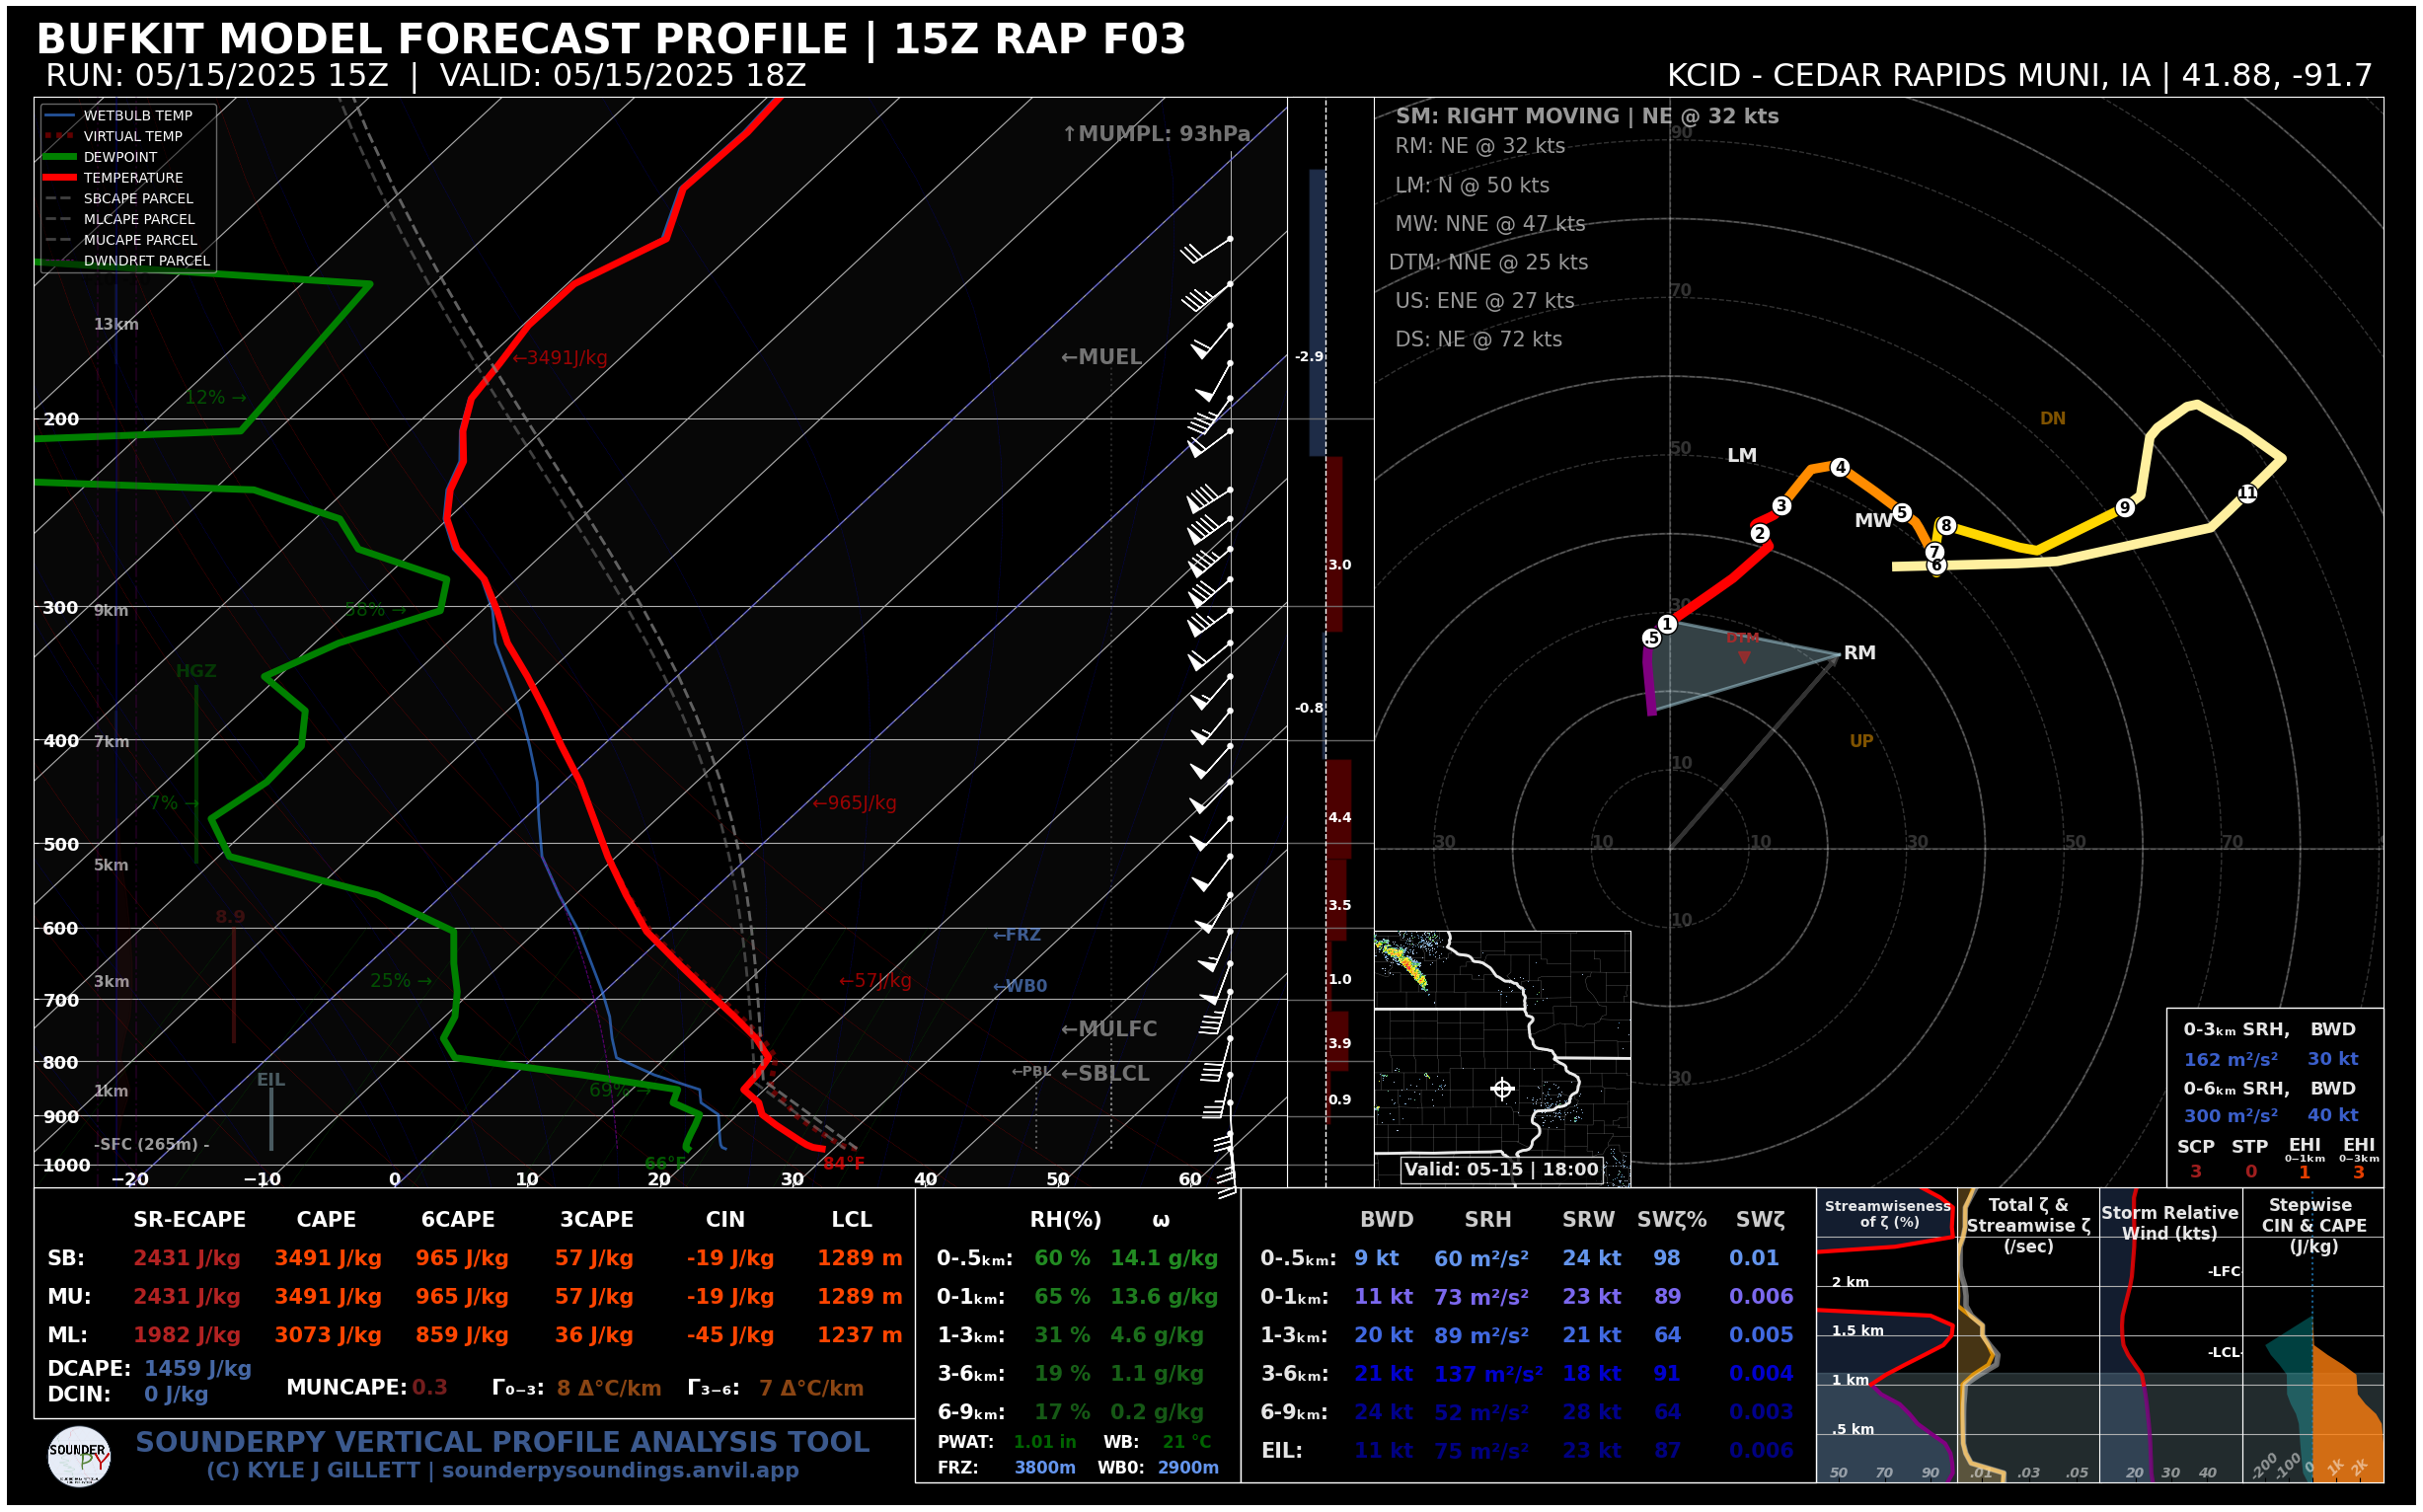

In [4]:
h = [["sb_ia_ecape"], ["sb_ps_ecape", "sb_ps_cape"]]
bufkit_data = spy.get_bufkit_data('rap', 'kcid', 3, '2025', '05', '15', '15')

while True:
    try:
        modinp = (input('Modify the surface conditions? <Y or N>')).capitalize()
        if modinp == "Y" or modinp == "N":
            break
        else:
            print('Please only use "Y/y" or "N/n" ')
    except ValueError:
        print("Invalid input. Please enter an integer.")

if modinp == "Y":
    T_F = float(input('enter the surface Temperature (ºF)'))
    Td_F = float(input('enter the surface Dew Point (ºF)'))
    T = round((T_F * units.degF).to(units.degC),1).magnitude
    Td = round((Td_F * units.degF).to(units.degC),1).magnitude
    #print(round(T,1).magnitude,round(Td,1).magnitude)
    print(T,Td)
    spy.build_sounding(bufkit_data, dark_mode=True, special_parcels='simple', map_zoom=0, modify_sfc={'T':T, 'Td':Td})
    #spy.build_sounding(bufkit_data, dark_mode=True, special_parcels=[["sb_ia_ecape"],["sb_ps_ecape", "sb_ps_cape"]], radar_time='sounding', map_zoom=0, modify_sfc={'T':T, 'Td':Td})
else:
    spy.build_sounding(bufkit_data, dark_mode=True, special_parcels='simple', map_zoom=0)

In [ ]:
#spy.get_bufkit_data('model', 'station', forecast_hr, 'run_year', 'run_month', 'run_day', 'run_hour')
#bufkit_data = spy.get_bufkit_data('hrrr', 'OUN', 0, '2024', '05', '07', '00')
#spy.build_sounding(clean_data, color_blind=False, dark_mode=False, storm_motion='right_moving', special_parcels=None, show_radar=True, radar_time='sounding', map_zoom=2, modify_sfc=None, save=False, filename='sounderpy_sounding')

> BUFKIT DATA ACCESS FUNCTION
   ---------------------------------
    > COMPLETE --------
    > RUNTIME: 00:00:01
    > SUMMARY: SUMMARY: 15Z RAP F03 for KCID,CEDAR RAPIDS MUNI at 05-15-2025-18Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 3491.1 | MUCAPE: 3491.1 | MLCAPE: 3073.1 | MUECAPE: 2431.5
    --- MU 0-3: 57.8 | MU 0-6: 966.0 | SB 0-3: 57.8 | SB 0-6: 966.0
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 24.4 knot | 0-500 SWV: 0.01 | 0-500 SHEAR: 9.3 | 0-500 SRH: 60.7
    --- 1-3km SRW: 21.3 knot | 1-3km SWV: 0.005 | 1-3km SHEAR: 21.0 | | 1-3km SRH: 89.8
 
> SOUNDING PLOTTER FUNCTION
  ---------------------------------


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


    > COMPLETE --------
    > RUNTIME: 00:00:03


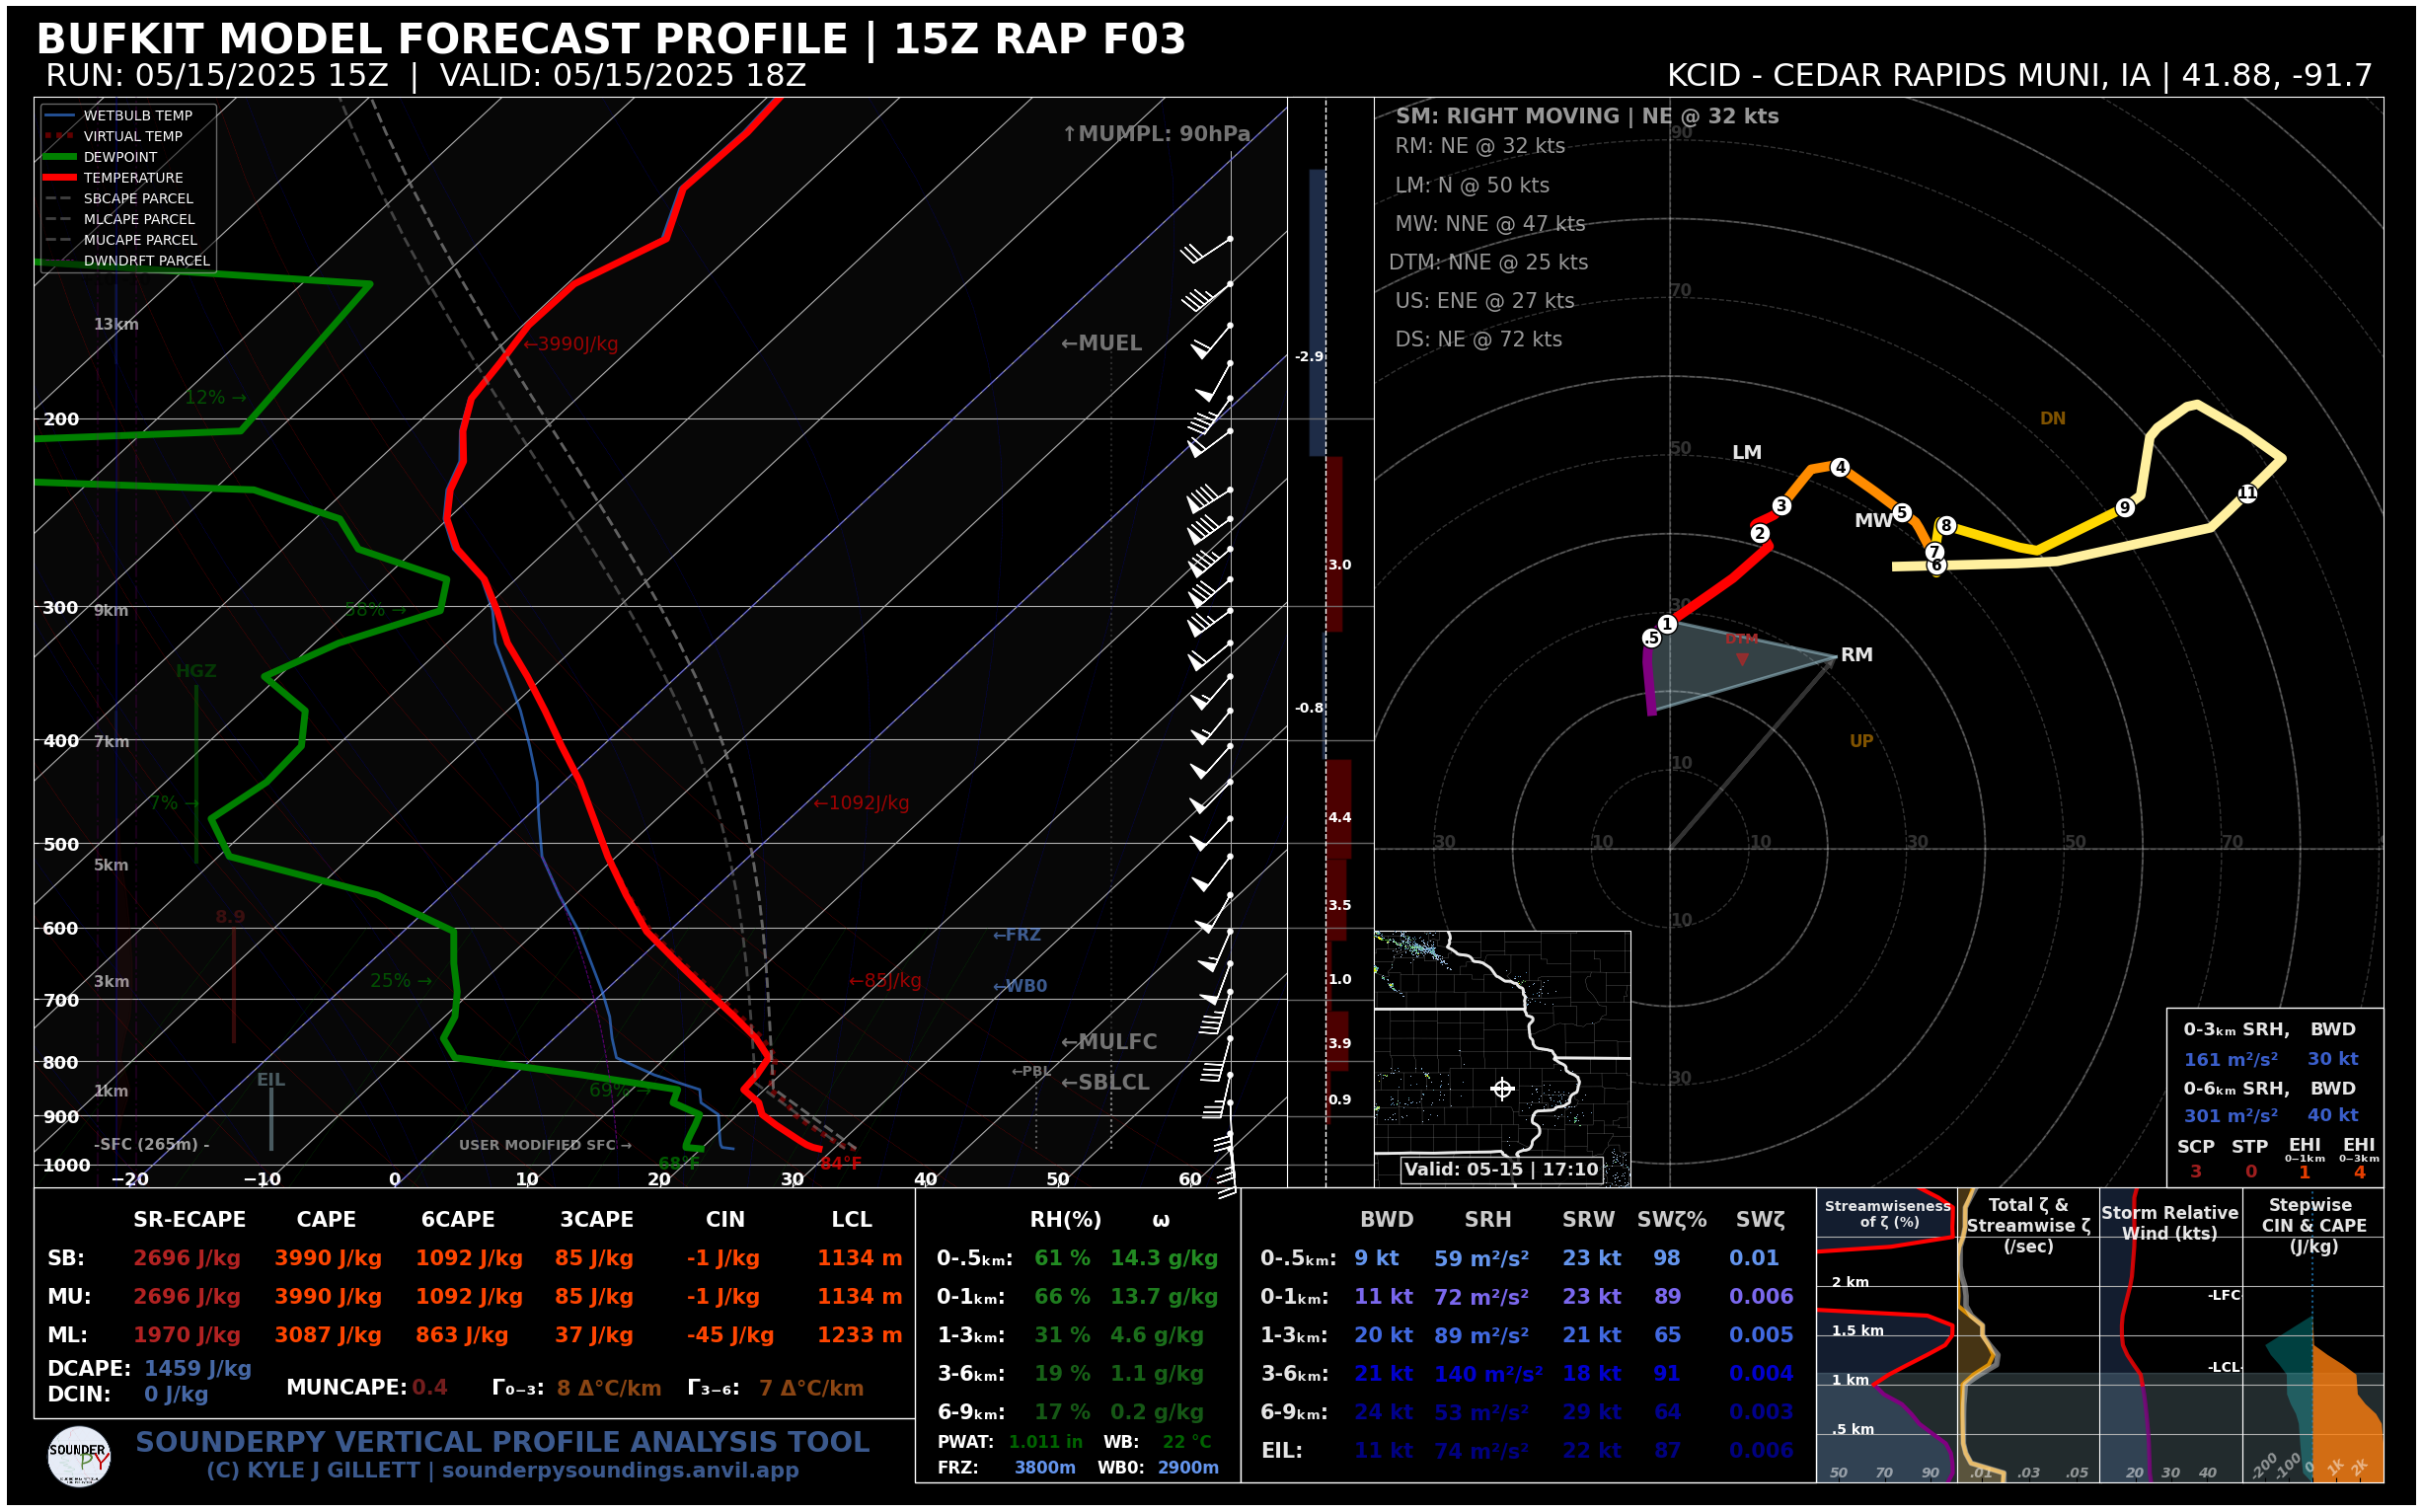

In [22]:
#spy.get_model_data(RAP, latlon, year, month, day, hour, dataset=None, box_avg_size=0.10, hush=False, clean_it=True)
h = [["sb_ia_ecape"], ["sb_ps_ecape", "sb_ps_cape"]]
bufkit_data = spy.get_bufkit_data('rap', 'kcid', 3, '2025', '05', '15', '15')
#spy.build_sounding(bufkit_data, dark_mode=True, special_parcels=special_parcels, radar_time='sounding', map_zoom=2, modify_sfc=None,modify_sfc={'T':21, 'Td':19, 'ws': 30, 'wd':270})
#spy.build_sounding(bufkit_data, dark_mode=True, special_parcels=[["sb_ia_ecape"],["sb_ps_ecape", "sb_ps_cape"]], radar_time='sounding', map_zoom=2, modify_sfc={'T':28.9, 'Td':20})
spy.build_sounding(bufkit_data, dark_mode=True, special_parcels='simple')
#spy.build_sounding(bufkit_data)

> BUFKIT DATA ACCESS FUNCTION
   ---------------------------------
    > COMPLETE --------
    > RUNTIME: 00:00:00
    > SUMMARY: SUMMARY: 12Z HRRR F00 for KCID,CEDAR RAPIDS MUNI at 05-15-2025-12Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 1299.2 | MUCAPE: 2908.9 | MLCAPE: 1731.8 | MUECAPE: 2328.4
    --- MU 0-3: 79.5 | MU 0-6: 797.9 | SB 0-3: 1.0 | SB 0-6: 348.0
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 28.5 knot | 0-500 SWV: 0.023 | 0-500 SHEAR: 21.3 | 0-500 SRH: 172.5
    --- 1-3km SRW: 18.1 knot | 1-3km SWV: 0.004 | 1-3km SHEAR: 25.0 | | 1-3km SRH: 64.8
 
> BUFKIT DATA ACCESS FUNCTION
   ---------------------------------
    > COMPLETE --------
    > RUNTIME: 00:00:00
    > SUMMARY: SUMMARY: 12Z HRRR F01 for KCID,CEDAR RAPIDS MUNI at 05-15-2025-13Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 1541.2 | MUCAPE: 3048.4 | MLCAPE: 1574.5 | MUECAPE: 2428.0
  

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


> COMPLETE --------
> RUNTIME: 00:00:00


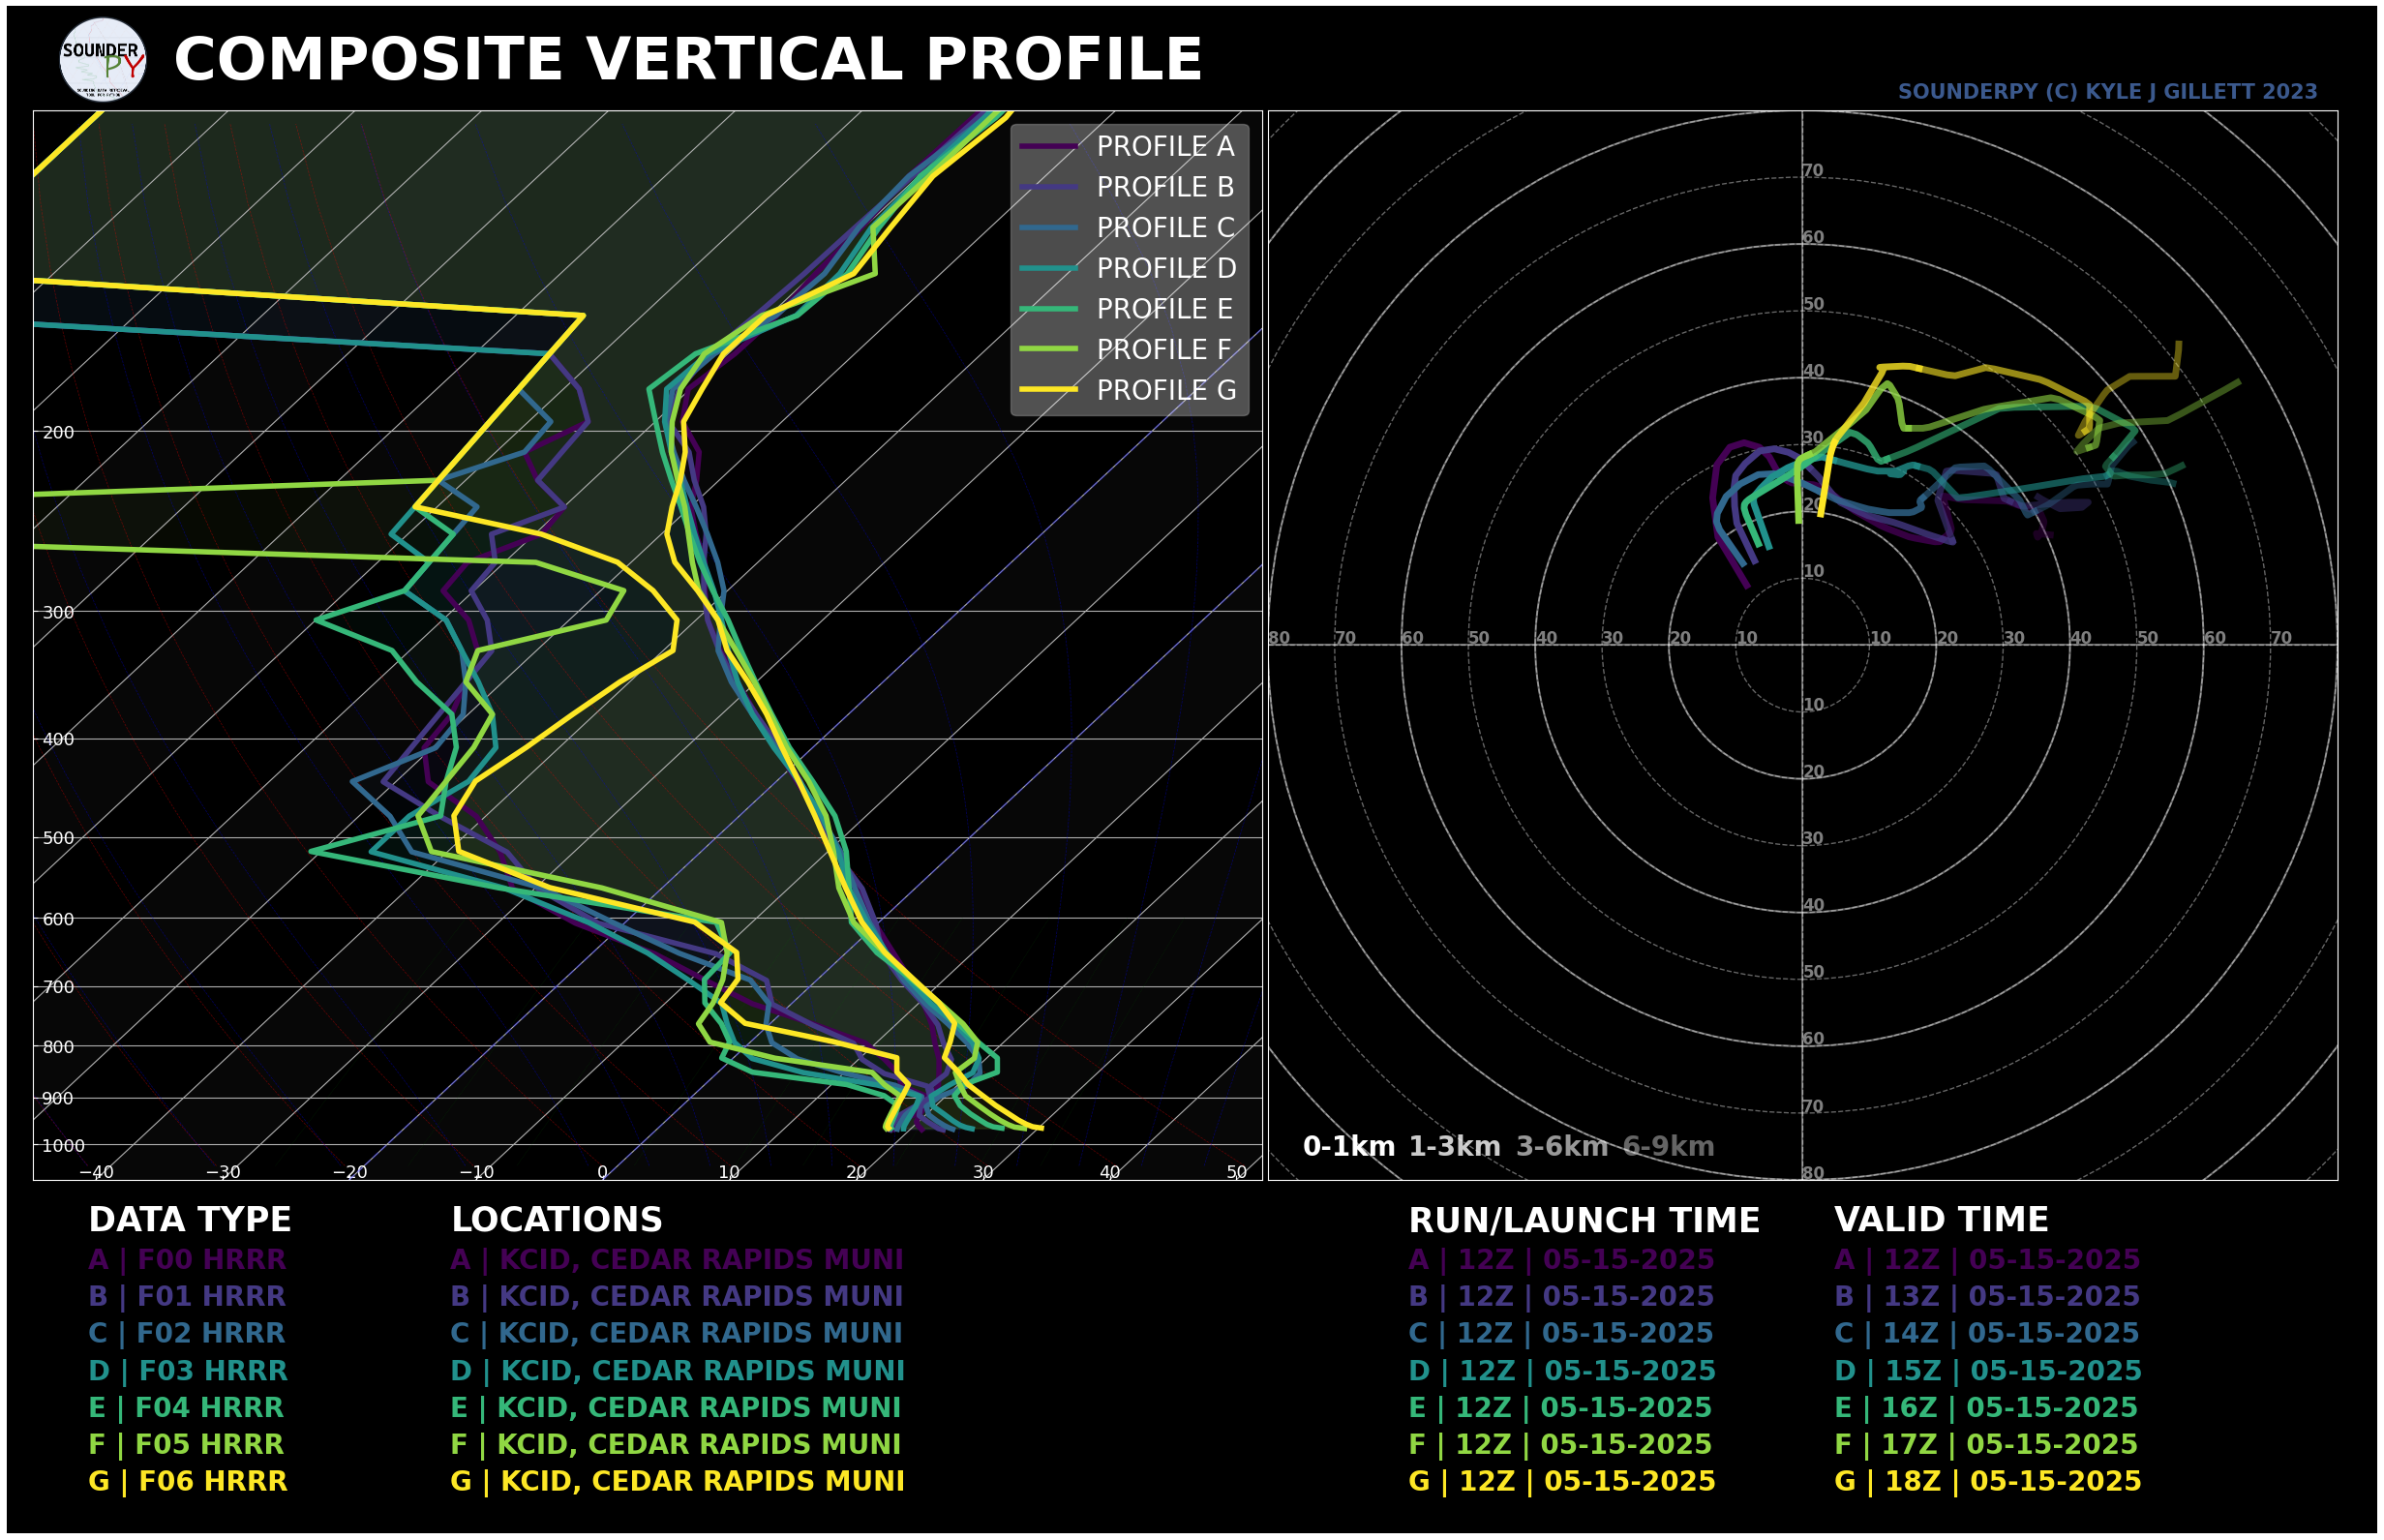

In [18]:
#Composite Soundings

data_list = []
'''
for hour in ['00', '01', '02', '03', '04', '05', '06']:
    cd = spy.get_bufkit_data('hrrr', 'kcid', 5, '2025', '05', '15', hour)#, hush=True)
    data_list.append(cd)
'''
for hour in [0, 1, 2, 3, 4, 5, 6]:
    cd = spy.get_bufkit_data('hrrr', 'kcid', hour, '2025', '05', '15', '12')#, hush=True)
    data_list.append(cd)

# and make it dark-mode for fun!
spy.build_composite(data_list, dark_mode=True, lw_to_use=[4 for cd in data_list])

In [ ]:


spy.build_vad_hodograph(vad_data, dark_mode=False, storm_motion='right_moving', sr_hodo=False, save=False, filename='sounderpy_sounding')

In [16]:

acars_conn = spy.acars_data('2025', '05', '15', '18')

# List profiles
t = acars_conn.list_profiles()

print(t)

> LIST ACARS PROFILES FUNCTION
  ---------------------------------
> AVAILABLE ACARS PROFILES FOR 2025-05-15 18Z...
> COMPLETE --------
> RUNTIME: 00:00:01
['ATL_1800', 'AUS_1800', 'AUS_1830', 'BIF_1810', 'BNA_1800', 'BNA_1820', 'BNA_1850', 'BUR_1800', 'BWI_1820', 'BWI_1840', 'BWI_1850', 'COS_1840', 'ELP_1830', 'GEG_1840', 'GSP_1800', 'HOU_1830', 'ISP_1800', 'JAN_1850', 'LAS_1830', 'MMUN_183', 'MMUN_184', 'MSY_1840', 'OAK_1800', 'PDX_1840', 'PHX_1800', 'PHX_1820', 'PSP_1810', 'RNO_1820', 'RNO_1830', 'SAN_1810', 'SAN_1840', 'SAT_1830', 'SJC_1810', 'SJC_1820', 'SMF_1820', 'SMF_1830', 'SMF_1840', 'SNA_1830', 'STL_1810']


In [27]:
# Start by setting up an 'ACARS connection'
hrstart = 19
#for i in range(4):
#    print(hrstart-i)
dlst=[]
hours = [hrstart-i for i in range(4)]
for i in hours:
    print(i)
    d = spy.acars_data('2025', '05', '15', str(i))
    #dat = d.list_profiles()
    dlst.append(d.list_profiles())

dat = [i for x in dlst for i in x]
# List profiles
#acars_conn.list_profiles()
print(dat)
res = any('DSM' in i for i in dat)
print(res)

#if any(i=='DSM' for i in dat):
#    print(dat.index('DSM'))


if any(i =='DSM' for i in dat):
    print(dat.index(i))

19
> LIST ACARS PROFILES FUNCTION
  ---------------------------------
> AVAILABLE ACARS PROFILES FOR 2025-05-15 19Z...
> COMPLETE --------
> RUNTIME: 00:00:01
18
> LIST ACARS PROFILES FUNCTION
  ---------------------------------
> AVAILABLE ACARS PROFILES FOR 2025-05-15 18Z...
> COMPLETE --------
> RUNTIME: 00:00:01
17
> LIST ACARS PROFILES FUNCTION
  ---------------------------------
> AVAILABLE ACARS PROFILES FOR 2025-05-15 17Z...
> COMPLETE --------
> RUNTIME: 00:00:01
16
> LIST ACARS PROFILES FUNCTION
  ---------------------------------
> AVAILABLE ACARS PROFILES FOR 2025-05-15 16Z...
> COMPLETE --------
> RUNTIME: 00:00:01
['ABQ_1920', 'ALB_1900', 'ATL_1920', 'AUS_1910', 'BUF_1910', 'BUR_1900', 'BUR_1920', 'BWI_1900', 'BWI_1910', 'COS_1910', 'DAL_1910', 'DCA_1920', 'DEN_1930', 'ECP_1920', 'ELP_1900', 'ELP_1920', 'LAS_1930', 'MAF_1910', 'MDW_1910', 'MSLP_190', 'OAK_1910', 'OAK_1930', 'ORD_1910', 'PHX_1900', 'PHX_1930', 'SAN_1920', 'SAN_1930', 'SFO_1920', 'SLC_1900', 'STL_1920', 'TP

> ACARS DATA ACCESS FUNCTION
  ---------------------------------
    > COMPLETE --------
    > RUNTIME: 00:00:01
    > SUMMARY: 17:09Z Flight from DSM, Des Moines International Airport at 05-15-2025-17:09Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 0.0 | MUCAPE: 0.0 | MLCAPE: 0.0 | MUECAPE: --
    --- MU 0-3: 0.0 | MU 0-6: -- | SB 0-3: 0.0 | SB 0-6: --
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: -- | 0-500 SWV: -- | 0-500 SHEAR: 15.1 | 0-500 SRH: --
    --- 1-3km SRW: -- | 1-3km SWV: -- | 1-3km SHEAR: 13.8 | | 1-3km SRH: --
 
> SOUNDING PLOTTER FUNCTION
  ---------------------------------


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


    > COMPLETE --------
    > RUNTIME: 00:00:01


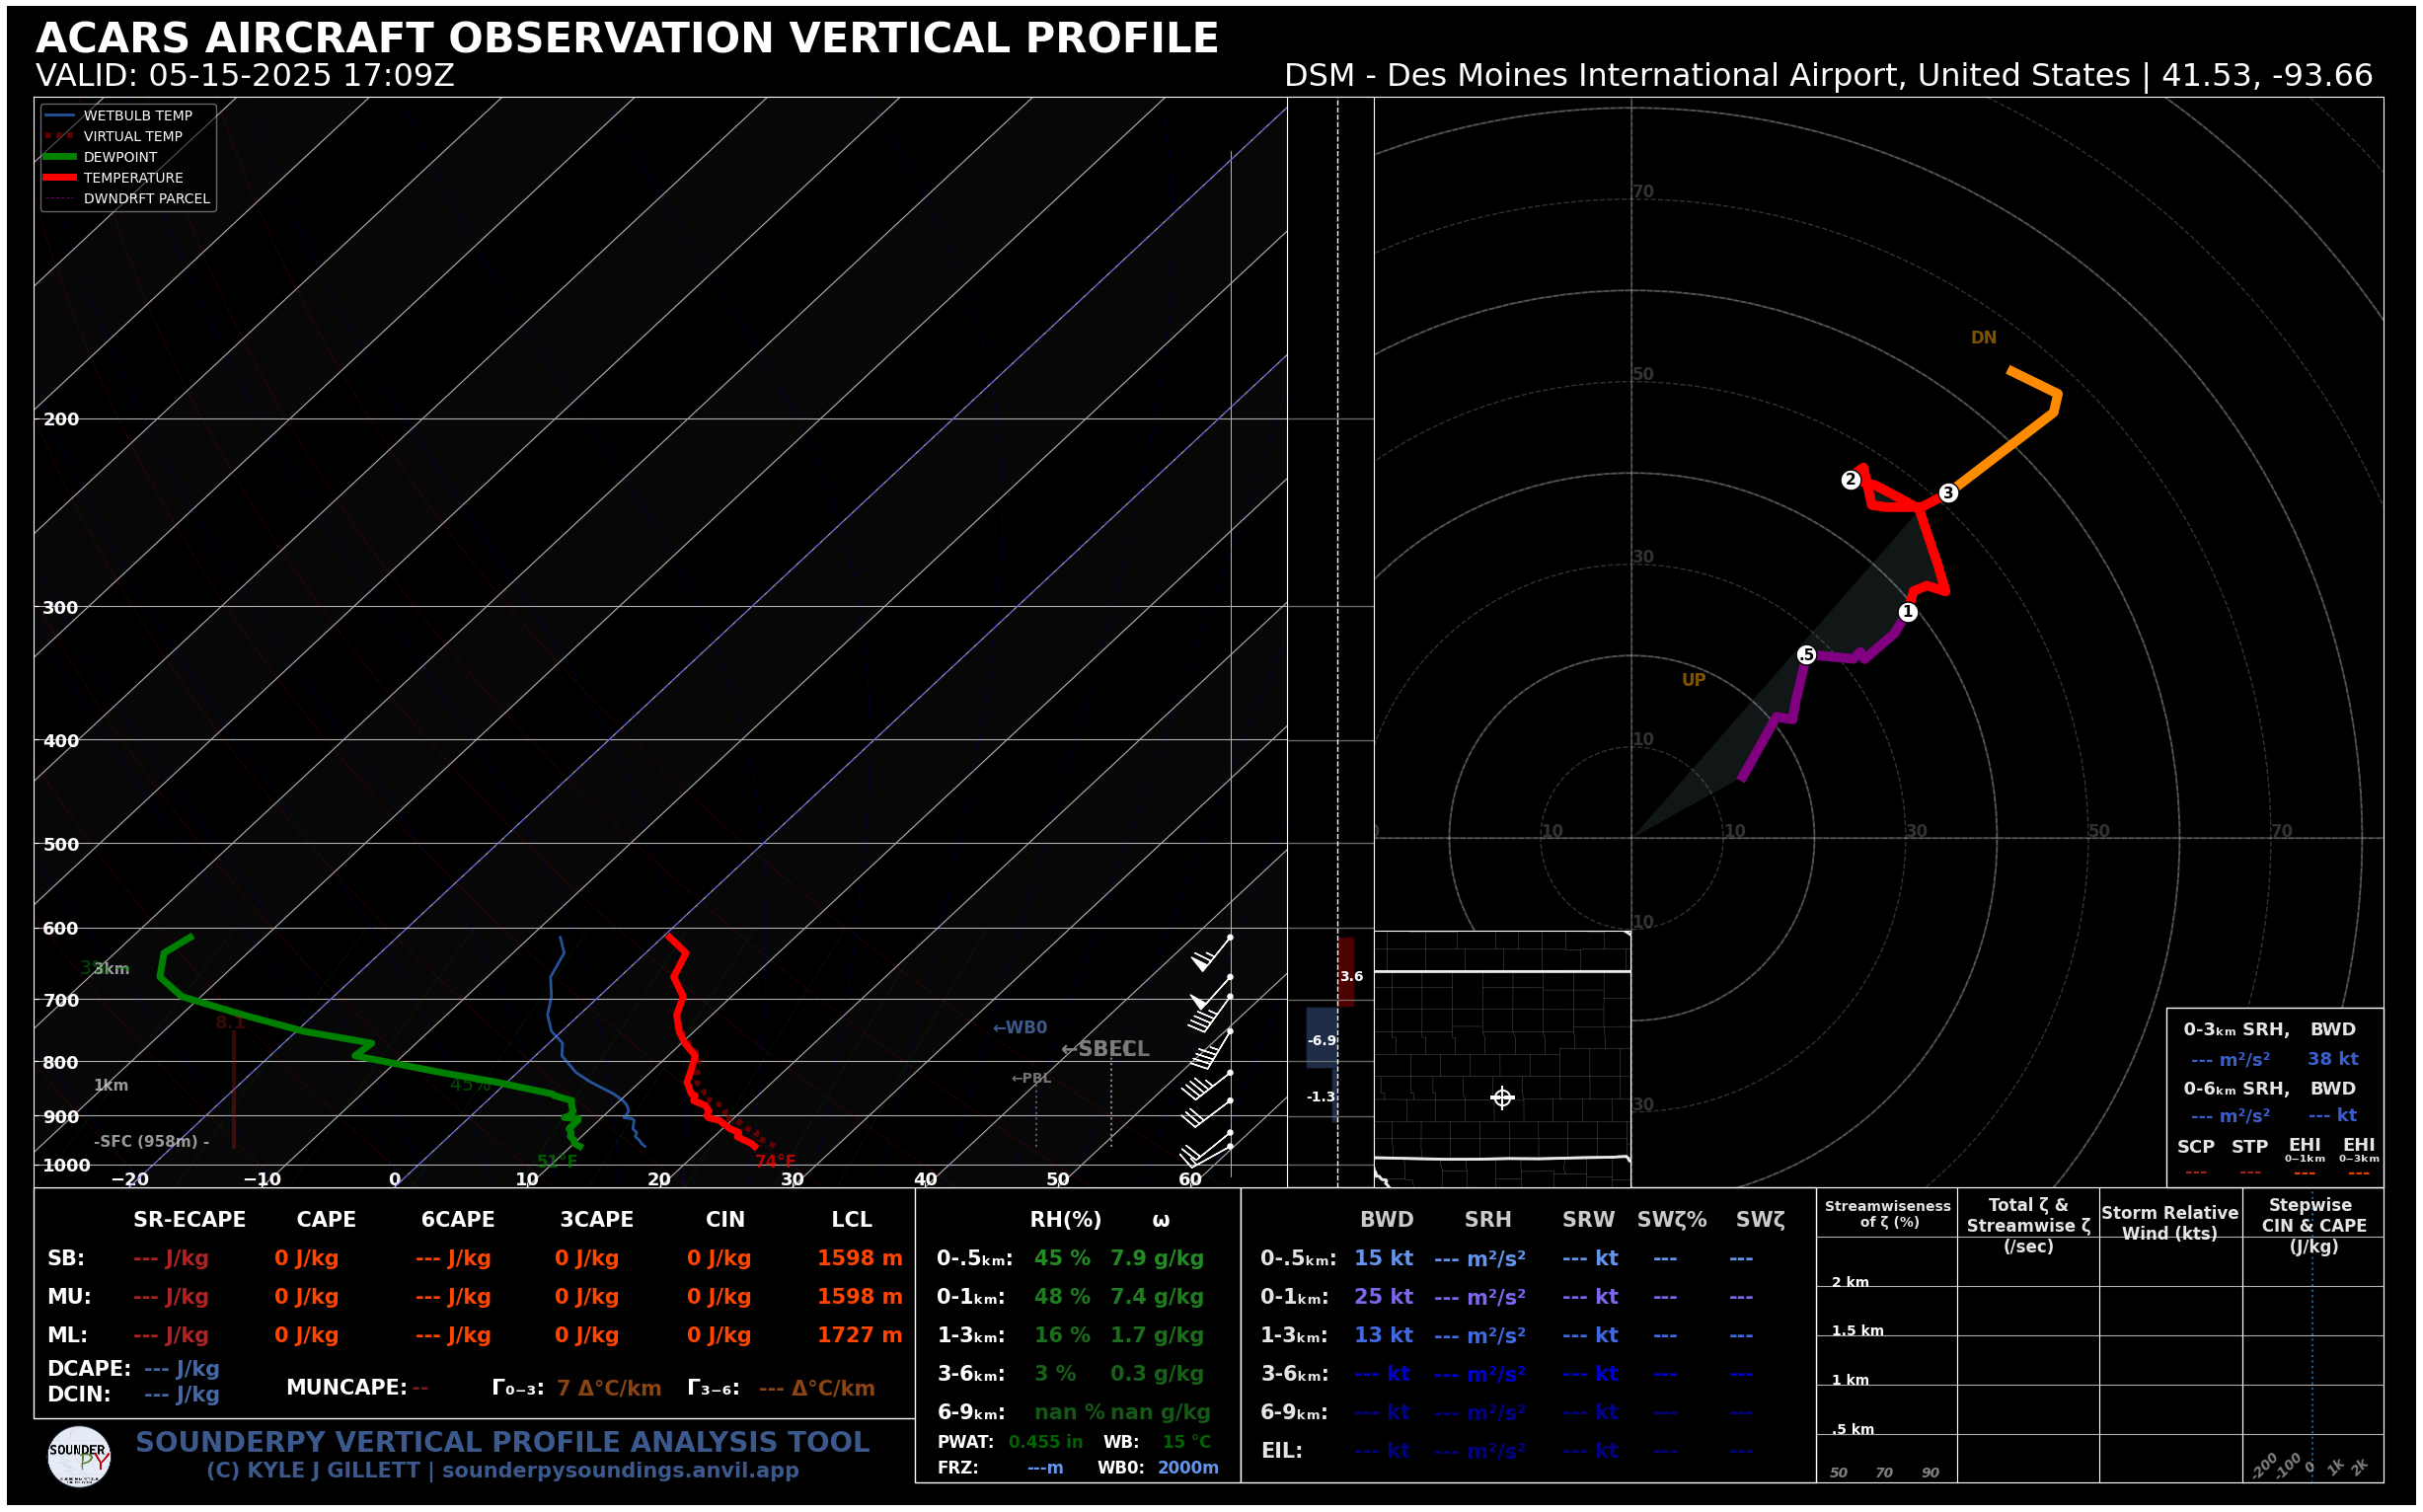

In [7]:
acars = acars_conn.get_profile('DSM_1710')
spy.build_sounding(acars, dark_mode=True, special_parcels='simple')

TypeError: 'module' object is not callable